In [2]:
from fastai.vision import *

In [7]:
#path = Path('/storage') / 'galaxyzoo'
path = Path('data')
path_hr = path/'images_test_rev1'
path_crop = path/'images_test_rev1_cropped'

il = ImageList.from_folder(path_hr)

In [8]:
def resize_one(fn, i, path):
    dest = path/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    im = PIL.Image.open(fn)
    #targ_sz = resize_to(img, size, use_min=True)
    #img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    width, height = im.size   # Get dimensions

    left = (width - 224)/2
    top = (height - 224)/2
    right = (width + 224)/2
    bottom = (height + 224)/2

    im=im.crop((left, top, right, bottom))
    im.save(dest)

parallel(partial(resize_one, path=path_crop), il.items)

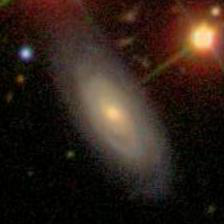

In [9]:
PIL.Image.open(path_crop.ls()[800])

In [15]:
path_crop.ls()[0]

PosixPath('/storage/galaxyzoo/images_training_rev1_cropped/468506.jpg')